##### Copyright 2020 The TensorFlow Authors. - https://www.tensorflow.org/tutorials/generative/autoencoder

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

Carregar Dataset

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Definir autoencoder

In [ ]:
latent_dim = 8 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder8 = Autoencoder(8) 
autoencoder64 = Autoencoder(64) 

Preparar modelo p/ otimização

In [ ]:
autoencoder8.compile(optimizer='adam', loss=losses.MeanSquaredError())

Treinar

In [ ]:
autoencoder8.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0350 - val_loss: 0.0244
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - val_loss: 0.0229
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0226 - val_loss: 0.0223
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - val_loss: 0.0220
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0219 - val_loss: 0.0218
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - val_loss: 0.0216
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0215 - val_loss: 0.0215
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0214 - val_loss: 0.0214
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0213 - val_loss: 0.0213
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.02

Testar (codificar e decodificar imagens)

In [ ]:
encoded_imgs = autoencoder8.encoder(x_test)
decoded_imgs = autoencoder8.decoder(encoded_imgs)

Mostrar originais e reconstrução

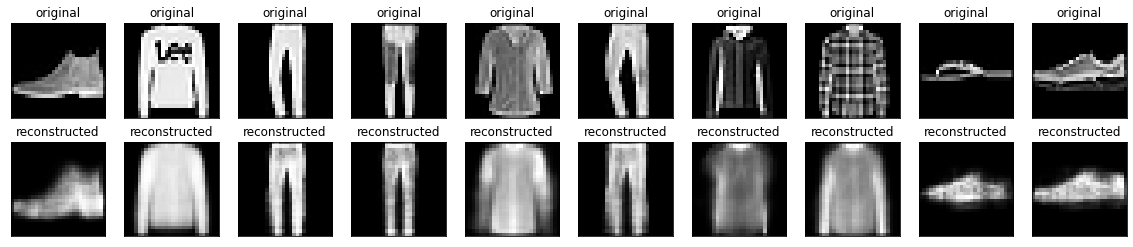

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder64.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder64.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs_64 = autoencoder64.encoder(x_test)



Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0227 - val_loss: 0.0140
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - val_loss: 0.0115
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0085 - val_loss: 0.0087
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

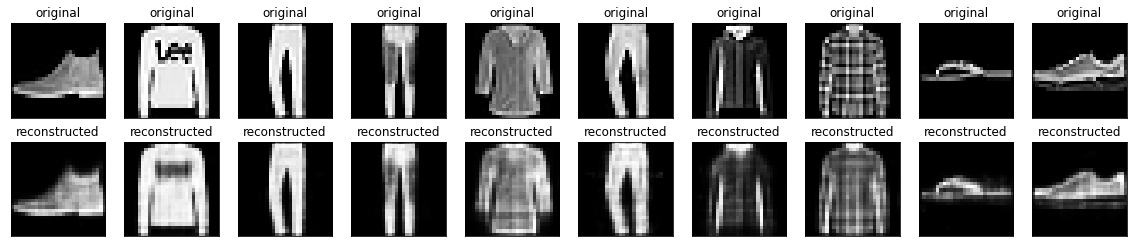

In [ ]:
decoded_imgs_64 = autoencoder64.decoder(encoded_imgs_64)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs_64[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#### CODIGO EXTRA - bonus: denoising
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


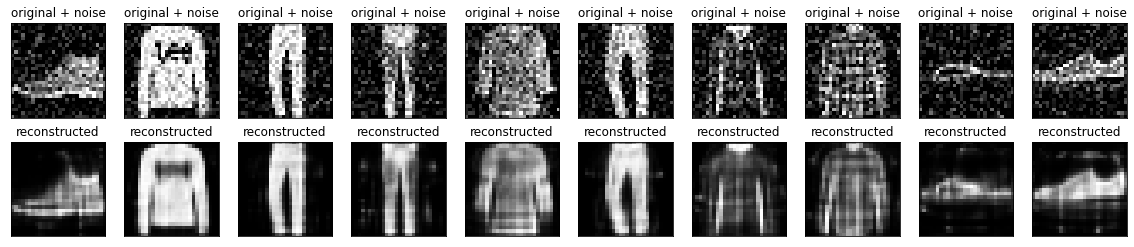

In [ ]:
encoded_imgs_64 = autoencoder64.encoder(x_test_noisy)
decoded_imgs_64 = autoencoder64.decoder(encoded_imgs_64)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  print(x_test_noisy[i].shape)
  plt.imshow(x_test_noisy[i])
  plt.title("original + noise")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs_64[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

(10000, 8)


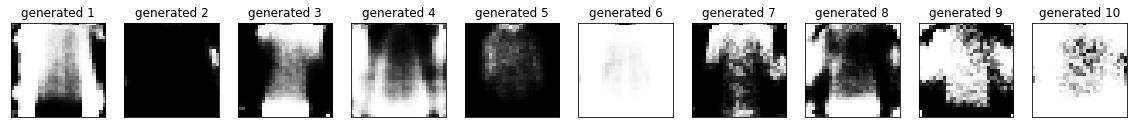

In [ ]:
### BONUS: GERACAO DE CONTEUDO

plt.figure(figsize=(20, 4))
print(encoded_imgs.shape)

for i in range(10):
  generated = autoencoder8.decoder(tf.random.uniform(shape=(1,8), minval=-25, maxval=25) )

    # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(generated[0])
  plt.title(f"generated {i+1}")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()